# Machine Learning

<br>

### Students

**Abdullah Baskran  :** 440012378<br>
**Abdullah Alrasheed:** 439027348<br>
**Sultan Almansour  :** 440016632<br>
**Mohammed Alawashiz:** 438020893<br>

<br>

### Introduction

In this program we used the heart dataset to classify if a person has heart disease or not, the classifying is done using a **decision tree**, we described each step of how we built the model and how we overcome the **overfitting** problem using post pruning.

<br>

In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

<br>

### Import data

First, we import the data from the heart dataset that we got and we use a function called "read_csv()" from the pandas library to load the data. We give each attribute a name then we show the five-row in the data.



In [2]:
df = pd.read_csv("heart.csv")
var_columns = [c for c in df.columns]

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<br>

### Missing data

After that, we look for any missing data that could be in the dataset, in this case, we go through every column and each value that is in the column then if there is any missing data it will print how many missing values besides the column name that have missing data.

In [3]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<br>

### Split the data

Now we must split the examples from the target in order to train and test the model.



In [4]:
x = df.drop('target', axis='columns')
y = df['target']

x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [5]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

<br>

### Dealing with categorical data

after we split the data we face a problem that in some columns, for instance, chest pain column its categorical means it has four types not only two so we have to encode it and we use "One-hot encode" that will convert to binary value zero and one but it will create another column, by using "get_dummies" function we could able to do it for chest pain column and the rest that have to be encoded.



In [6]:
x_encoded = pd.get_dummies(x, columns=['cp', 'thal', 'ca', 'slope', 'restecg'])
x_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_0,cp_1,...,ca_1,ca_2,ca_3,ca_4,slope_0,slope_1,slope_2,restecg_0,restecg_1,restecg_2
0,63,1,145,233,1,150,0,2.3,0,0,...,0,0,0,0,1,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,0,...,0,0,0,0,1,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,1,...,0,0,0,0,0,0,1,1,0,0
3,56,1,120,236,0,178,0,0.8,0,1,...,0,0,0,0,0,0,1,0,1,0
4,57,0,120,354,0,163,1,0.6,1,0,...,0,0,0,0,0,0,1,0,1,0


<br>

### Classifier

First, we split the data into 70% to train the model and 30% to test the model, then we calculate the accuracy and we got 100% train data accuracy and 80.0% test data accuracy, you can see that the data having overfitting since the training accuracy is a lot greater than test accuracy, then we show the tree that have size 77 which is huge.



In [7]:
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.3, random_state=2)

tree_clf = DecisionTreeClassifier(criterion="entropy", random_state=0)

tree_clf = tree_clf.fit(x_train, y_train)

y_predict_test = tree_clf.predict(x_test)
y_predict_train = tree_clf.predict(x_train)

print(f'Accuracy of the training sample = {accuracy_score(y_train, y_predict_train)*100}%')
print(f'Accuracy of the test sample = {round(accuracy_score(y_test, y_predict_test), 2)*100}%')

print("Tree size:", tree_clf.tree_.node_count)

Accuracy of the training sample = 100.0%
Accuracy of the test sample = 80.0%
Tree size: 77


<br>

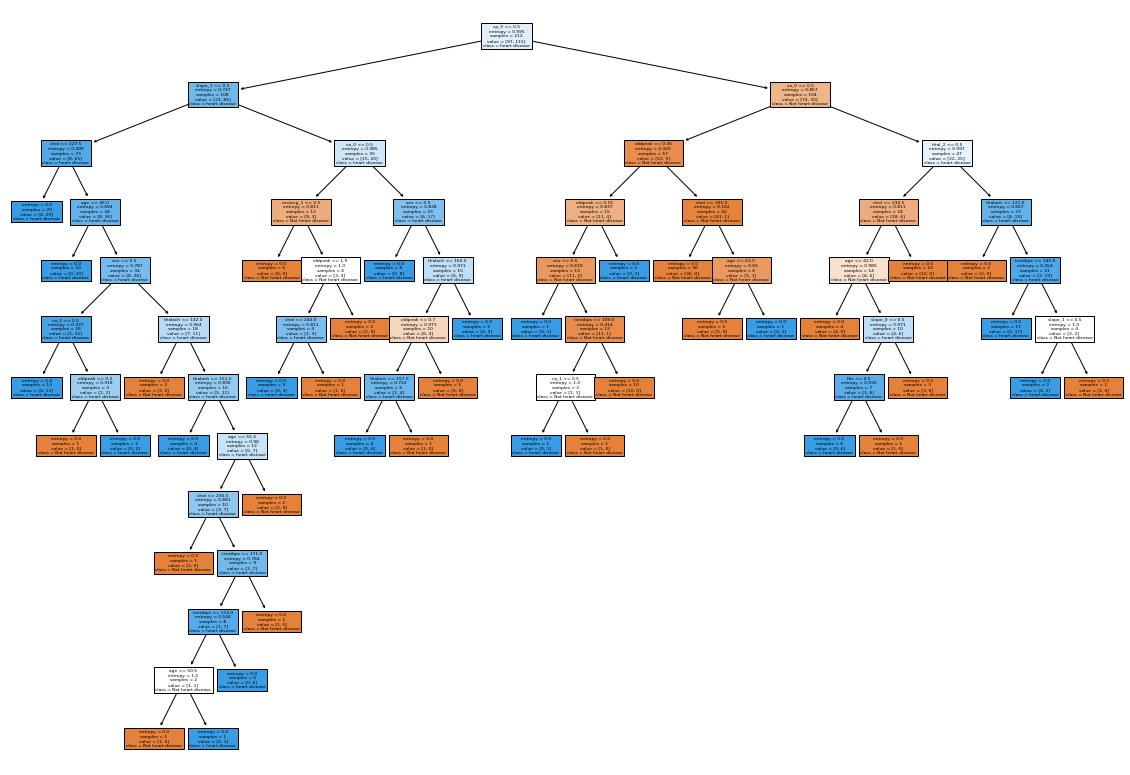

In [8]:
plt.figure(figsize=[20, 14])
plot_tree(tree_clf, filled=True, class_names=['Not heart disease', 'heart disease'], feature_names=x_encoded.columns)
plt.show()

<br>

### Confusion matrix

Here is the confusion matrix for train, test data that will help us to find out how many the model failed to classify correctly.



confusion Matrix (Train)


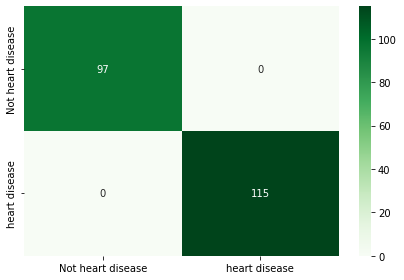

confusion Matrix (Test)


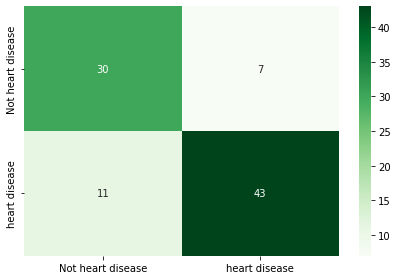

In [9]:
cf_train = metrics.confusion_matrix(y_predict_train, y_train)
cf_test = metrics.confusion_matrix(y_predict_test, y_test)
sn.heatmap(cf_train, annot=True, yticklabels=['Not heart disease', 'heart disease'], xticklabels=['Not heart disease', 'heart disease'], cmap='Greens', fmt='g')

print("confusion Matrix (Train)")

plt.tight_layout()
plt.show()
print("confusion Matrix (Test)")
sn.heatmap(cf_test, annot=True, yticklabels=['Not heart disease', 'heart disease'], xticklabels=['Not heart disease', 'heart disease'], cmap='Greens', fmt='g')

plt.tight_layout()
plt.show()

<br>

### Precision and Recall

we can calculate precision and recall for train data as well as test data.



In [10]:
print(f'Train precision: {metrics.precision_score(y_train, y_predict_train)}')
print(f'Train recall: {metrics.recall_score(y_train, y_predict_train)}')
print(f'Test precision: {round(metrics.precision_score(y_test, y_predict_test), 2)}')
print(f'Test recall: {round(metrics.recall_score(y_test, y_predict_test), 2)}')

Train precision: 1.0
Train recall: 1.0
Test precision: 0.8
Test recall: 0.86


<br>

### Overfitting issue

In general, there is a high risk of overfitting the model when using decision trees. Because it becomes increasingly complex as the depth and number of splits increase. As a result, the model's variance increases. Although this reduces training error, prediction on new data points is relatively poor. As a result, the pruning procedure comes to the rescue.

Decision Tree pruning ensures that a full tree is pruned in order to reduce the model's complexity and variance. It makes the decision tree versatile enough to adapt to any new data fed to it, thereby resolving the overfitting problem. It reduces the size of the decision tree, which may slightly increase training error but significantly reduces testing error. As a result, it has become more adaptable.

**There are two types of pruning: (pre-pruning) and (post-pruning)**

**In our model we will use (post-pruning)**

<br>

# Post pruning

post pruning is applied after building the tree, the algorithm we are using is **cost_complexity_pruning**

<br>

first, we need to calculate **alpha** in order to calculate the accuracy score for each one, in the code below we got all available alphas

In [11]:
path = tree_clf.cost_complexity_pruning_path(x_train, y_train)
alphas = path['ccp_alphas']

alphas

array([0.        , 0.00943396, 0.00943396, 0.01071212, 0.01272793,
       0.0130276 , 0.01398963, 0.01415094, 0.01423022, 0.01455739,
       0.01607948, 0.01702661, 0.01732932, 0.01761952, 0.01886792,
       0.01953637, 0.0212153 , 0.02276294, 0.02393827, 0.02426988,
       0.02607568, 0.02678057, 0.02689795, 0.02737386, 0.02974337,
       0.04623314, 0.05688584, 0.08884652, 0.18900507])

<br>

In this part, we calculated train accuracy, test accuracy, tree size, tree depth, and the mean and standard deviation of alpha for every value of alpha

In [12]:
acc_train = []
acc_test = []
tree_size = []
tree_depth = []
alpha_values = []

for alpha in alphas:
    temp_tree = DecisionTreeClassifier(ccp_alpha=alpha, criterion="entropy", random_state=0)
    temp_tree.fit(x_train, y_train)

    y_predect_train, y_predect_test = temp_tree.predict(x_train), temp_tree.predict(x_test)
    
    scores = cross_val_score(temp_tree, x_train, y_train, cv=5)
    
    alpha_values.append([alpha, np.mean(scores), np.std(scores)])
    tree_depth.append(temp_tree.get_depth())
    tree_size.append(temp_tree.tree_.node_count)
    acc_train.append(accuracy_score(y_train, y_predect_train))
    acc_test.append(accuracy_score(y_test, y_predect_test))

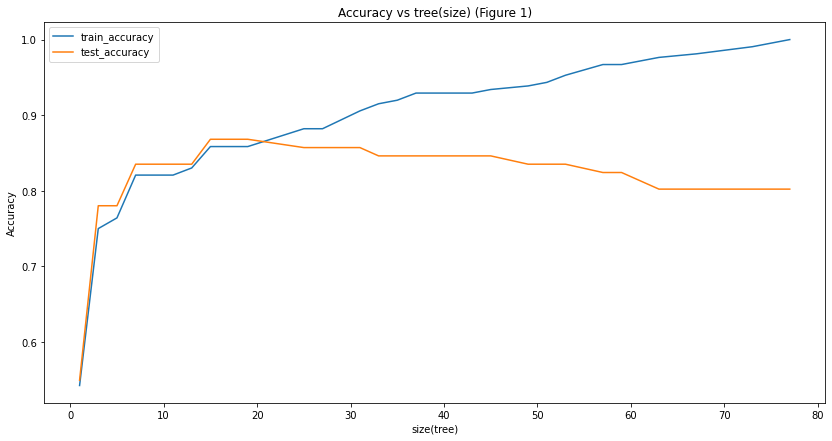

In [13]:
plt.figure(figsize=(14, 7))
plt.plot(tree_size, acc_train, label='train_accuracy')
plt.plot(tree_size, acc_test, label='test_accuracy')
plt.legend()
plt.xlabel("size(tree)")
plt.ylabel("Accuracy")
plt.title('Accuracy vs tree(size) (Figure 1)')
plt.show()

Figure (**1**) shows that as tree size increase the accuracy of training data increases while test accuracy decreases

<br>

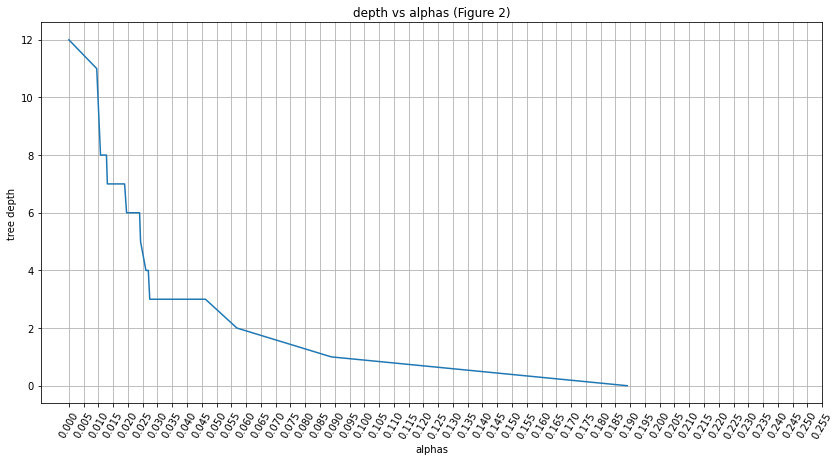

In [14]:
plt.figure(figsize=(14, 7))
plt.plot(alphas, tree_depth)
plt.xticks(ticks=np.arange(0.00, 0.26, 0.005), rotation=60)
plt.xlabel("alphas")
plt.ylabel("tree depth")
plt.title('depth vs alphas (Figure 2)')
plt.grid()
plt.show()

Figure (**2**) shows that the relationship between alpha and tree depth is inversely proportional

<br>

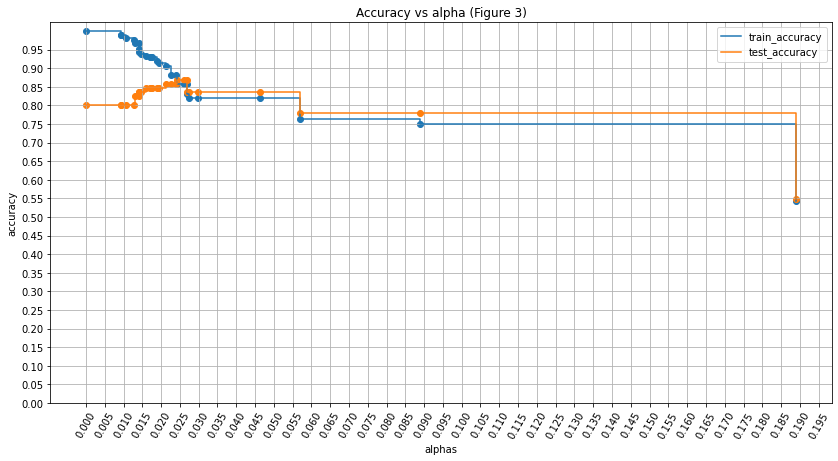

In [15]:
plt.figure(figsize=(14, 7))
plt.scatter(alphas, acc_train)
plt.scatter(alphas, acc_test)
plt.plot(alphas, acc_train, label='train_accuracy', drawstyle="steps-post")
plt.plot(alphas, acc_test, label='test_accuracy', drawstyle="steps-post")
plt.xlabel("alphas")
plt.ylabel("accuracy")
plt.xticks(ticks=np.arange(0.00, 0.2, 0.005), rotation=60)
plt.yticks(ticks=np.arange(0.00, 1.00, 0.05))
plt.legend()
plt.title('Accuracy vs alpha (Figure 3)')
plt.grid()
plt.show()

Figure (**3**) shows the training and test accuracy for each alpha point, we can see that between 0.02 and 0.03 we got the highest accuracy result

**From fig(2) and fig(3), we concluded that a high increase in alpha gives smaller tree (good) and low accuracy (bad), so we need to increase it to the point that reduces the tree size and increase the accuracy**

<br>

<AxesSubplot:xlabel='alpha'>

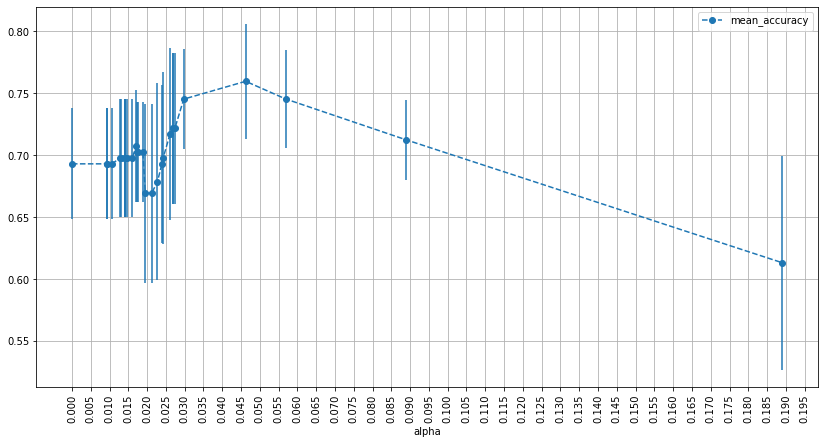

In [16]:
alpha_result = pd.DataFrame(alpha_values, columns=['alpha', 'mean_accuracy', 'std'])
alpha_result.plot(x='alpha', y='mean_accuracy', yerr='std', marker='o', linestyle='--', figsize=(14, 7), xticks=np.arange(0, 0.2, 0.005), grid=True, rot=90)

In [17]:
alpha_result[(alpha_result['alpha'] > 0.02) & (alpha_result['alpha'] < 0.03)]

,alpha,mean_accuracy,std
16,0.021215,0.669324,0.072401
17,0.022763,0.678738,0.079332
18,0.023938,0.693023,0.063592
19,0.024270,0.697785,0.069215
20,0.026076,0.716833,0.069496
21,0.026781,0.721595,0.061338
22,0.026898,0.721595,0.061338
23,0.027374,0.721595,0.061338
24,0.029743,0.745293,0.040661


From the table above we can see that **ccp_alpha = 0.026781** will yield the best accuracy for our tree model

<br>

### Building the decision tree classifier

As you can see below we used the **ccp_alpha** value we got from our previous calculations

In [18]:
tree_clf = DecisionTreeClassifier(random_state=0, criterion='entropy', ccp_alpha=0.026781)
tree_clf = tree_clf.fit(x_train, y_train)

y_predict_test1 = tree_clf.predict(x_test)
y_predict_train1 = tree_clf.predict(x_train)

print(f'Accuracy of the training sample = {round(accuracy_score(y_train, y_predict_train1), 3)*100}%')
print(f'Accuracy of the test sample = {round(accuracy_score(y_test, y_predict_test1), 3)*100}%')

Accuracy of the training sample = 85.8%
Accuracy of the test sample = 86.8%


**You can clearly see Above the difference in accuracy between the previous and the new model**

# 

For tree size we got 15 nodes vs 77 in the old tree

Tree size: 15


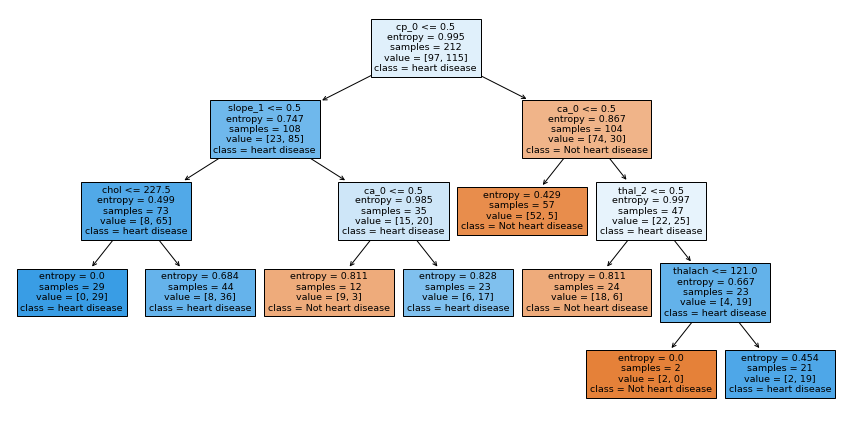

In [19]:
plt.figure(figsize=[15, 7.5])
plot_tree(tree_clf, filled=True, class_names=['Not heart disease', 'heart disease'], feature_names=x_encoded.columns)

print("Tree size:", tree_clf.tree_.node_count)
plt.show()

confusion Matrix (Train)


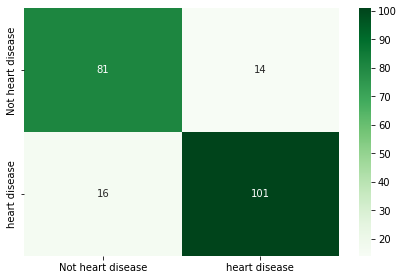

confusion Matrix (Test)


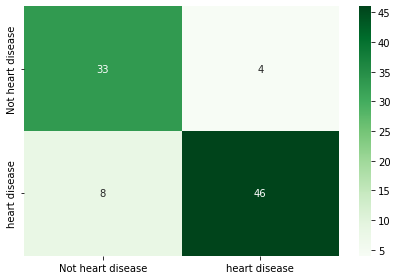

In [20]:
cf_train = metrics.confusion_matrix(y_predict_train1, y_train)
cf_test = metrics.confusion_matrix(y_predict_test1, y_test)
sn.heatmap(cf_train, annot=True, yticklabels=['Not heart disease', 'heart disease'], xticklabels=['Not heart disease', 'heart disease'], cmap='Greens', fmt='g')

print("confusion Matrix (Train)")

plt.tight_layout()
plt.show()
print("confusion Matrix (Test)")
sn.heatmap(cf_test, annot=True, yticklabels=['Not heart disease', 'heart disease'], xticklabels=['Not heart disease', 'heart disease'], cmap='Greens', fmt='g')

plt.tight_layout()
plt.show()

In [21]:
print(f'Train precision: {round(metrics.precision_score(y_train, y_predict_train1), 2)}')
print(f'Train recall: {round(metrics.recall_score(y_train, y_predict_train1), 2)}')
print(f'Test precision: {round(metrics.precision_score(y_test, y_predict_test1), 2)}')
print(f'Test recall: {round(metrics.recall_score(y_test, y_predict_test1), 2)}')

Train precision: 0.86
Train recall: 0.88
Test precision: 0.85
Test recall: 0.92


**From the confusion matrices and the results above we think we solved the overfitting problem**